<a href="https://colab.research.google.com/github/P-sys/classification-2021/blob/main/cmaes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install cmaes

100%|██████████| 300/300 [1:28:17<00:00, 17.66s/it]


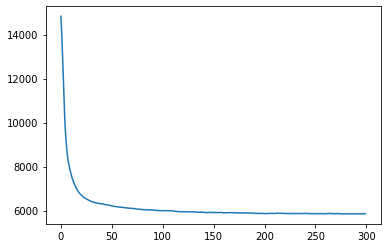

100%|██████████| 300/300 [1:28:12<00:00, 17.64s/it]


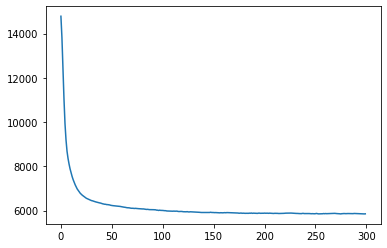

100%|██████████| 300/300 [1:28:30<00:00, 17.70s/it]


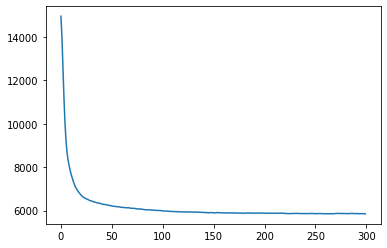

Best result:615.0


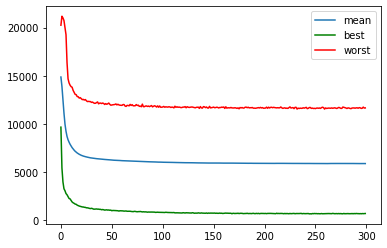

In [2]:
import numpy as np
from math import cos, pi
import matplotlib.pyplot as plt
import random
from random import randint
from tqdm import tqdm
import os

# Directory to store data
directory = '/Desktop/plots'
if not os.path.exists(directory):
  os.makedirs(directory)

# Functions

def rastriginFunction(x, A=10):

  n = x.shape[1]
  n_0 = x.shape[0]
  
  summy = np.zeros(n_0)
  half_x = int(n_0/2)

  for i in range(half_x):
    for j in range(n):
      x[i,j] = round(x[i, j])
  for i in range(n):
    summy = summy + ( x[:,i]**2 - A * np.cos(2*pi*x[:,i]) )

  c = A * n
    
  return c + summy

# CMA-ES
class CMA_ES:

    def __init__(self):

        # Initialize mean and standard deviation
        self.theta_mean = np.random.uniform(min_val, max_val, (dim_theta))

        theta_std = np.random.uniform(max_val-1, max_val, (dim_theta))
        self.theta_cov = np.diag(theta_std)

        self.n_samples = n_samples
        self.t = n_iterations
        self.top_p = top_p
        self.fit_gaussian()

    def fit_gaussian(self):
        # theta is actually the population sampled from the distribution
        theta = np.random.multivariate_normal(self.theta_mean, self.theta_cov, (n_samples))
        self.theta = np.clip(theta, min_val, max_val)

    def generation(self):
        # Sample n_sample candidates from N(theta)
        mean_fitness = []
        best_fitness = []
        worst_fitness = []

        for i in tqdm(range(0, self.t)):
            fitness = self.evaluate_fitness(self.theta)

            mean_fitness.append(np.mean(fitness))
            best_fitness.append(np.min(fitness))
            worst_fitness .append(np.max(fitness))

            couple = list(zip(self.theta, fitness.T))
            sorted_fitness= sorted(couple, key=lambda tup: tup[1])
            elite = self.take_elite(sorted_fitness)
            
            e_candidates = [i[0] for i in elite]

            plt.pause(pause)
            self.theta_cov = self.compute_new_cov(e_candidates)
            self.theta_mean = self.compute_new_mean(e_candidates)
            self.fit_gaussian()

        
        plt.plot(mean_fitness)
        plt.show()

        return mean_fitness, best_fitness, worst_fitness     

    def take_elite(self, candidates):
        n_top = int((self.n_samples * self.top_p)/ 100)
        elite = candidates[:n_top]
        return elite

    def compute_new_mean(self, e_candidates):
        
        new_means = np.mean(e_candidates, axis=0)
        return new_means

    def compute_new_cov(self, e_candidates):
        e_candidates = np.array(e_candidates)
        I = np.identity(dim_theta)
        cov = np.zeros((dim_theta, dim_theta))
        for i in range(dim_theta):
            for j in range(dim_theta):
                cov[i,j] = np.sum(((e_candidates[:,i] - self.theta_mean[i]) * (e_candidates[:,j] - self.theta_mean[j])), axis=0)

        return 1/e_candidates.shape[0] * cov + I * 1e-3

    def evaluate_fitness(self, candidates):
      
      return rastriginFunction(candidates)

# Run the desired algorithm and return the data
def run():
  cma = CMA_ES()
  m, b, w = cma.generation()
  
  return m, b, w


# number of dimensions
dim_theta = 1000

# Population Size
n_samples = 3000

# Elite ratio percentage
top_p = 20

# Number of Generations
n_iterations = 300

# Range of values
min_val = -5.12
max_val = 5.12

# Number of Runs
runs = 3

# Plot output frequency
pause = 0.01

mean = []
best = []
worst = []

# Run the algorithm runs times and save the results
for i in range(runs):
    m, b, w = run()
    mean.append(m)
    best.append(b)
    worst.append(w)

# Compute the mean over the runs
mean_3 = np.mean(mean, axis=0)
best_3 = np.mean(best, axis=0)
worst_3 = np.mean(worst, axis=0)

print('Best result:{}'.format(np.min(best_3)))

# Plot the data
plt.plot(mean_3, label='mean')
plt.plot(best_3, 'g', label='best')
plt.plot(worst_3, 'r', label='worst')
plt.legend(loc='upper right')
plt.show()

# np.save(directory + "/" + "cma_es_mean"  + "_" + str(dim_theta) + "_" + str(n_samples) + "_" + str(n_iterations) + "_" + str(top_p) + "_" + str(alpha), mean_3)
# np.save(directory + "/" + algorithm + "_" + "best" + "_" + str(dim_theta) + "_" + str(n_samples) + "_" + str(n_iterations) + "_" + str(top_p) + "_" + str(alpha), best_3)
# np.save(directory + "/" + algorithm + "_" + "worst" + "_" + str(dim_theta) + "_" + str(n_samples) + "_" + str(n_iterations) + "_" + str(top_p) + "_" + str(alpha), worst_3)